In [1]:
import pmdarima as pm
import csv

In [2]:
from pmdarima import auto_arima

In [3]:
with open('BTC-USD.csv', newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        print(row)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2017-06-01', '2288.330078', '2448.389893', '2288.330078', '2407.879883', '2407.879883', '1653180032']
['2017-06-02', '2404.030029', '2488.550049', '2373.320068', '2488.550049', '2488.550049', '1317030016']
['2017-06-03', '2493.719971', '2581.909912', '2423.570068', '2515.350098', '2515.350098', '1514950016']
['2017-06-04', '2547.790039', '2585.889893', '2452.540039', '2511.810059', '2511.810059', '1355120000']
['2017-06-05', '2512.399902', '2686.810059', '2510.219971', '2686.810059', '2686.810059', '1369309952']
['2017-06-06', '2690.840088', '2999.909912', '2690.840088', '2863.199951', '2863.199951', '2089609984']
['2017-06-07', '2869.379883', '2869.379883', '2700.560059', '2732.159912', '2732.159912', '1517709952']
['2017-06-08', '2720.489990', '2815.300049', '2670.949951', '2805.620117', '2805.620117', '1281170048']
['2017-06-09', '2807.439941', '2901.709961', '2795.620117', '2823.810059', '2823.810059', '1348950016']


In [4]:
myfile = 'BTC-USD.csv'

In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv(myfile,index_col=None)

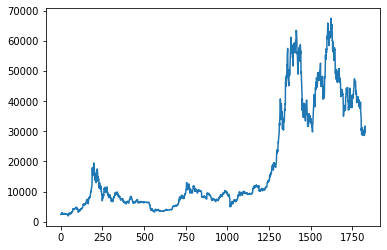

In [8]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [9]:
#Train test split
to_row = int(len(df)*0.8)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

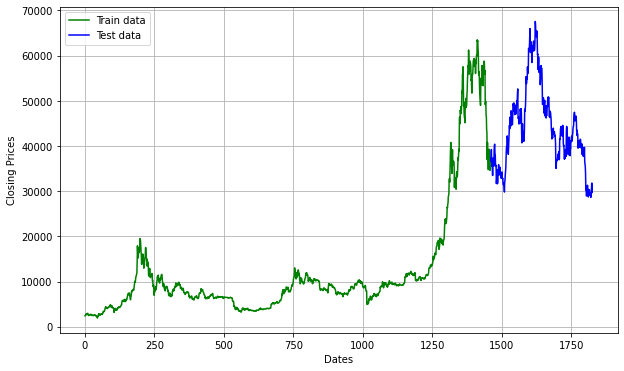

In [10]:
#Split data into train and test set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label = 'Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label = 'Test data')
plt.legend()

In [11]:
model_predictions = []
n_test_obser = len(testing_data)

In [12]:
#for i in range(n_test_obser):
 #   model = sm.tsa.arima.ARIMA(training_data, order = (4,1,0))
  #  model_fit = model.fit()
   # output = model_fit.forecast()
    #print(output)
    #break

In [13]:
import statsmodels.api as sm

In [14]:
for i in range(n_test_obser):
    model = sm.tsa.arima.ARIMA(training_data, order = (2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output)
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1826
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -15186.907
Date:                Fri, 02 Sep 2022   AIC                          30381.813
Time:                        12:59:54   BIC                          30403.851
Sample:                             0   HQIC                         30389.942
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0152      7.241     -0.002      0.998     -14.207      14.176
ar.L2          0.0026      0.219      0.012      0.991      -0.427       0.432
ma.L1         -0.0153      7.241     -0.002      0.9

In [16]:
#ADF Test to check if the price series is stationary
#The null hypothesis of the ADF test is that the time series is non-stationary. So if the p-value of the test is less than the significance level 0.05 then we can reject the null hypothesis and infer that the time series is indeed stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Adj Close'].dropna())
print(f"ADF Statistic:' {result[0]}")
print(f"p-value:' {result[1]}")

ADF Statistic:' -1.3743155857654763
p-value:' 0.594525746120787


In [17]:
from statsmodels.graphics.tsaplots import plot_acf

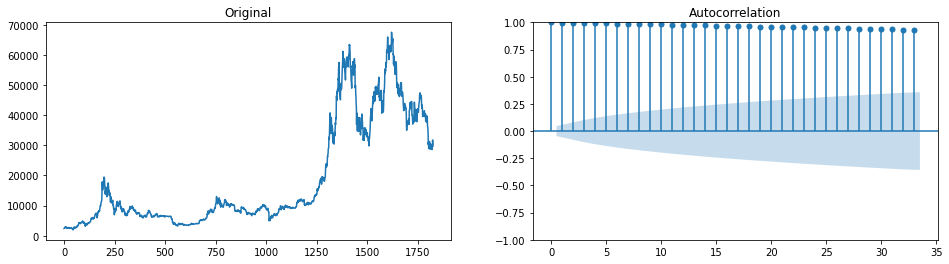

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df['Adj Close'])
ax1.set_title('Original')
#add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df['Adj Close'], ax=ax2);

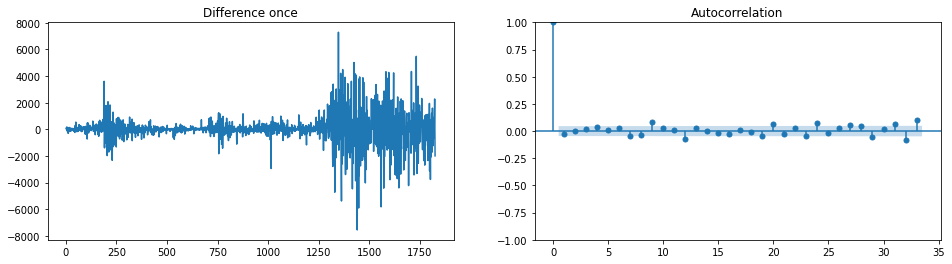

In [19]:
diff = df['Adj Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
plot_acf(diff, ax=ax2);

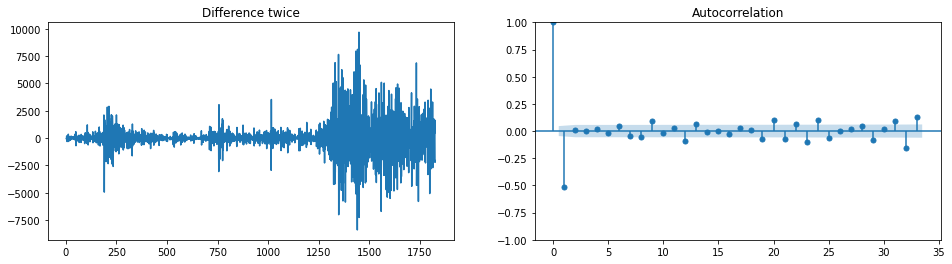

In [20]:
diff = df['Adj Close'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference twice')
plot_acf(diff, ax=ax2);

In [21]:
#We can use pmdarima package to get the number of diferencing
from pmdarima.arima.utils import ndiffs

In [22]:
ndiffs(df['Adj Close'], test='adf')

1

In [23]:
#p os the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.
#We can find out the requirement number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
#The partial autocorrelation represents the correlation between the series and its lags

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf

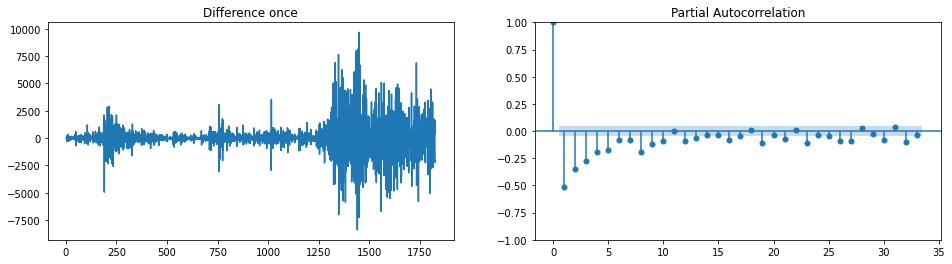

In [25]:
diff = df['Adj Close'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

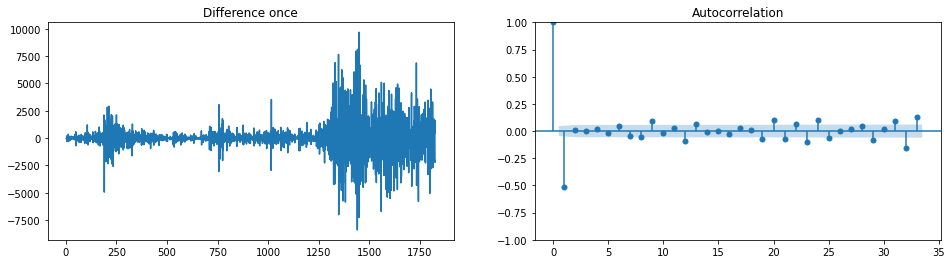

In [26]:
#q is the order of the mOVING aVERAGE (ma) term. It refers to the number of lagged forecast errors that should go into the ARIMA model.
#We can look at the ACF plot for th number of MA terms
diff = df['Adj Close'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [27]:
#FITTING THE ARIMA MODEL
from statsmodels.tsa.arima_model import ARIMA

In [28]:
import statsmodels.api as sm

In [29]:
model2 = sm.tsa.statespace.SARIMAX(df['Adj Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.42763D+00    |proj g|=  6.31106D-02


 This problem is unconstrained.



At iterate    5    f=  8.39193D+00    |proj g|=  5.29993D-03

At iterate   10    f=  8.38869D+00    |proj g|=  3.58919D-04

At iterate   15    f=  8.38796D+00    |proj g|=  1.30444D-03

At iterate   20    f=  8.32388D+00    |proj g|=  6.38247D-02
  ys=-6.920E-02  -gs= 2.613E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.28169D+00    |proj g|=  8.35315D-04

At iterate   30    f=  8.28169D+00    |proj g|=  8.09379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     68      2     1     0   8.094D-04   8.282D+00
  F =   8.2816910831687149     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


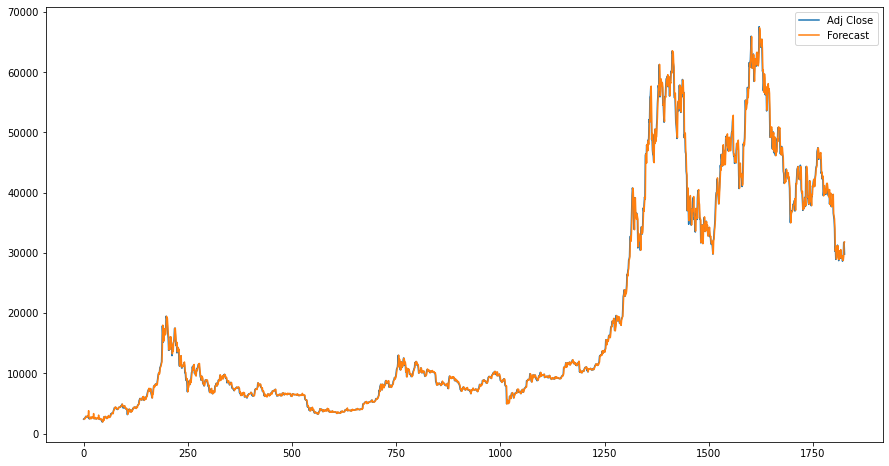

In [43]:
df['Forecast'] = results.predict(start=1, end=1827, dynamic=False)
arima = df[['Adj Close', 'Forecast']].plot(figsize=(15,8))

In [41]:
from sklearn import metrics

In [48]:
#print(metrics.mean_squared_error(model2, arima))

TypeError: Expected sequence or array-like, got <class 'statsmodels.tsa.statespace.sarimax.SARIMAX'>

In [31]:
#EXPONENTIAL SMOOTHING
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [76]:
train_es = df['Adj Close'].iloc[0:1461]
test_es = df['Adj Close'].iloc[1461:]

<AxesSubplot:>

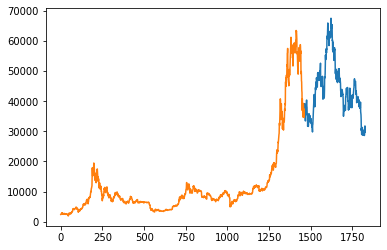

In [77]:
test_es.plot()
train_es.plot()

In [78]:
#The seasonal can be mul or add. It can be additive seasonality or multiplicative seasonality
model_es = ExponentialSmoothing(train_es, trend='add', seasonal='add', seasonal_periods=10).fit()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

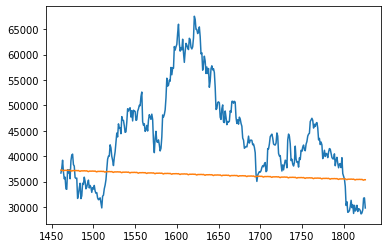

In [81]:
#Predictions for our test data
test_es.plot()
model_es.forecast(366).plot()

<AxesSubplot:>

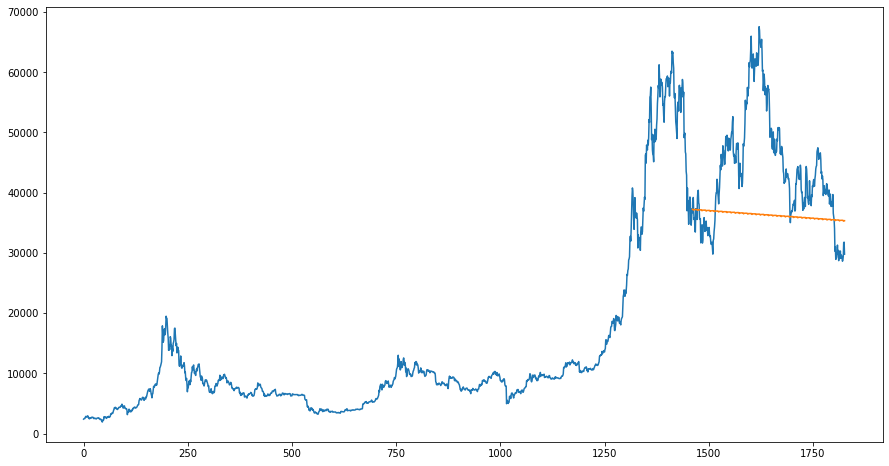

In [82]:
##Predictions for our test data in the whole dataset 'Adj Close'
df['Adj Close'].plot(figsize=(15,8))
model_es.forecast(366).plot()

<AxesSubplot:>

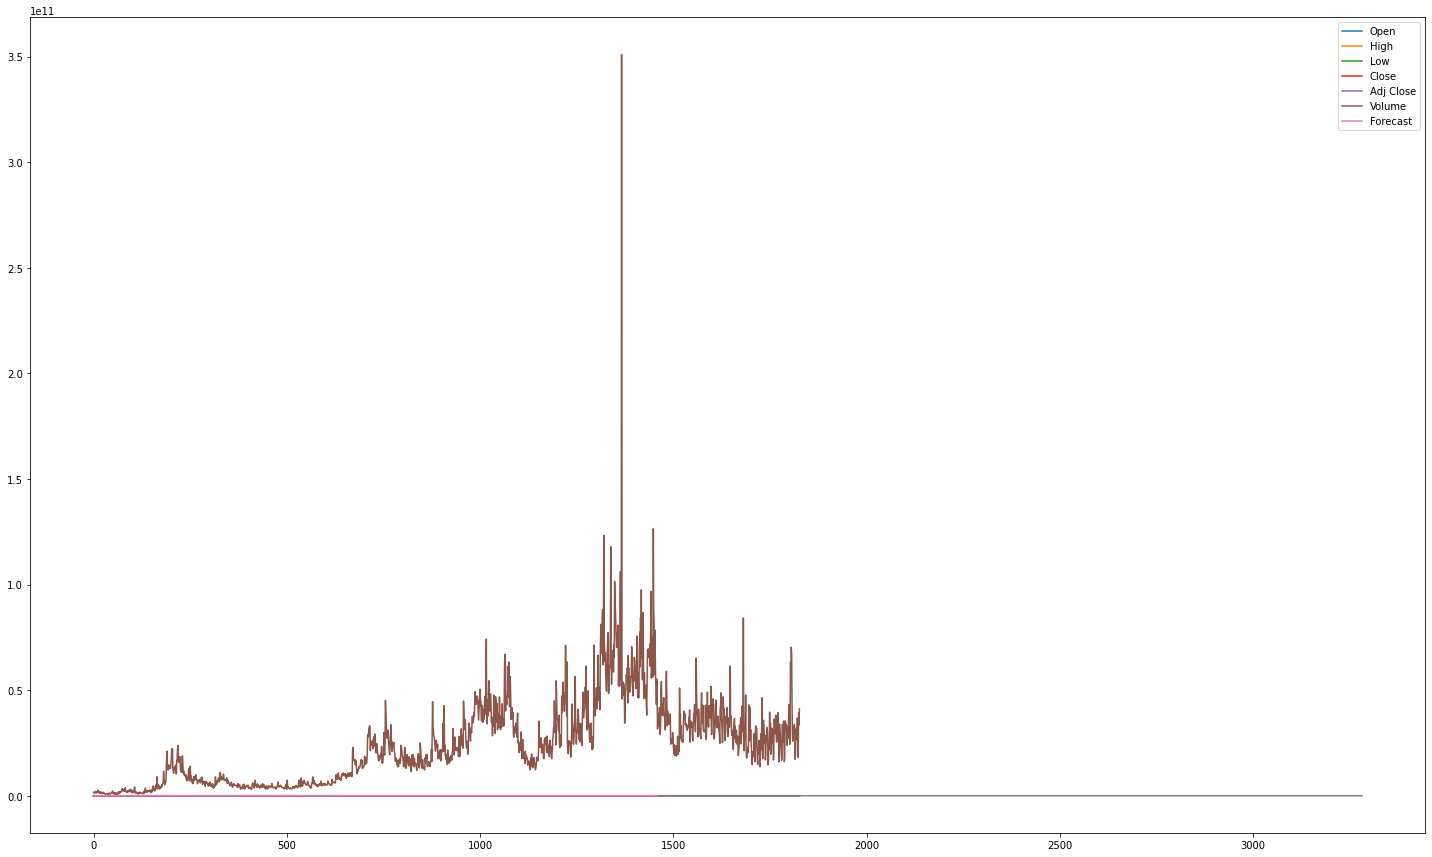

In [83]:
df.plot(figsize=(25,15))
model_es.forecast(1821).plot()

<AxesSubplot:title={'center':'Holt Winters Exponential Smoothing'}>

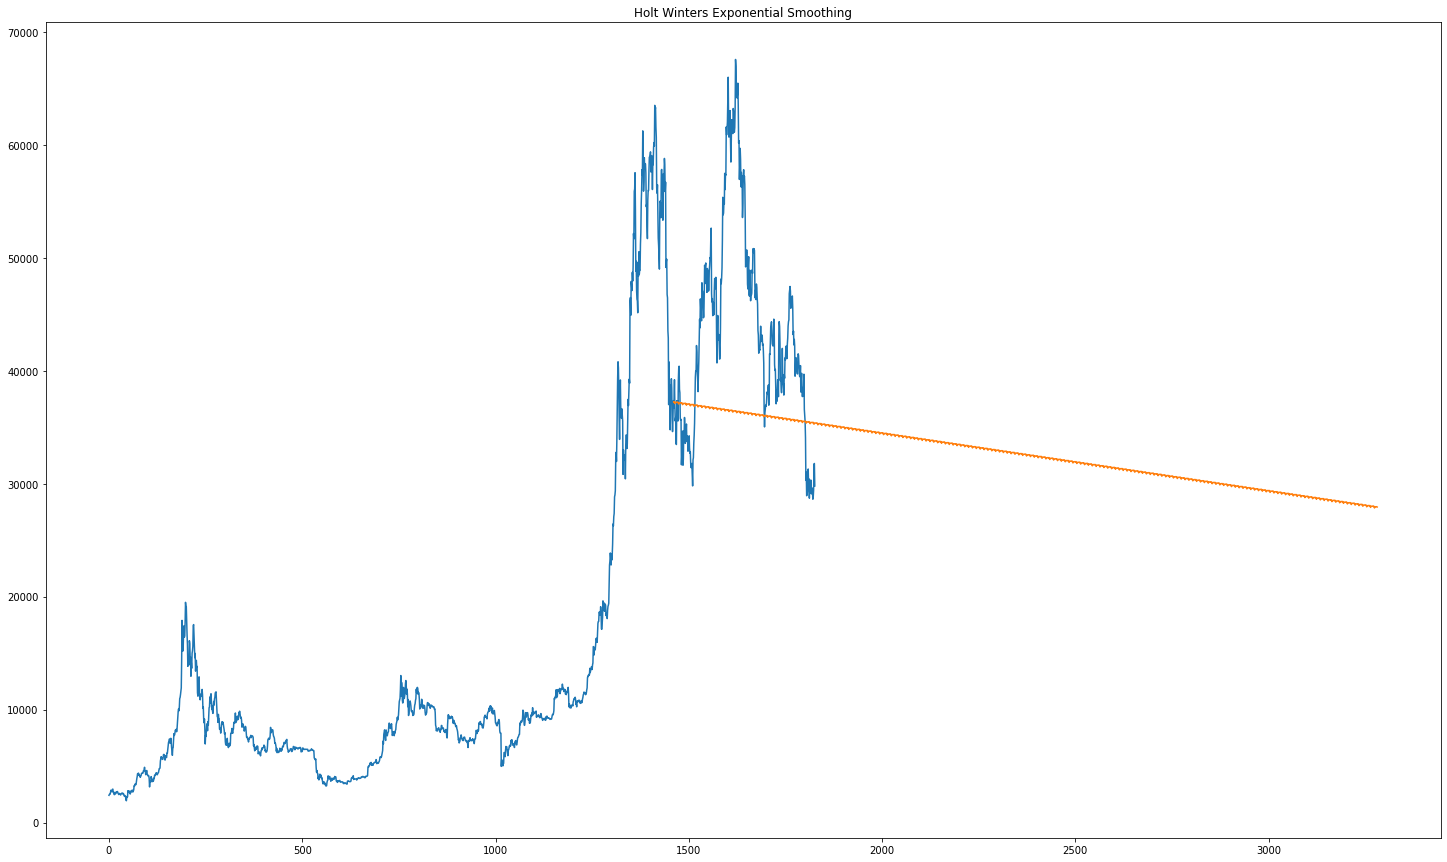

In [87]:
df['Adj Close'].plot(figsize=(25,15))
model_es.forecast(1821).plot(title= 'Holt Winters Exponential Smoothing')

In [ ]:
#df['Adj Close'].plot(figsize=(25,15))
#model_es.forecast(366).plot()

In [57]:
model_es_test = ExponentialSmoothing(test_es, trend='add', seasonal='add', seasonal_periods=10).fit()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

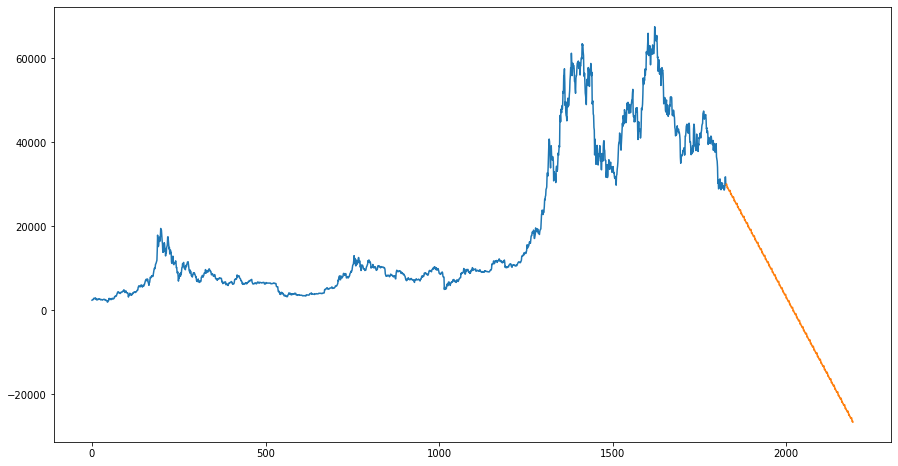

In [58]:
##Predictions for our test data in the whole dataset 'Adj Close'
df['Adj Close'].plot(figsize=(15,8))
model_es_test.forecast(366).plot()

In [ ]:
#Future forecasting
model_es2 = ExponentialSmoothing(endog = df['Adj Close']).fit()

In [ ]:
#Prediction for 30 days ahead
predictions_es = model_es2.forecast(steps = 30)

<AxesSubplot:>

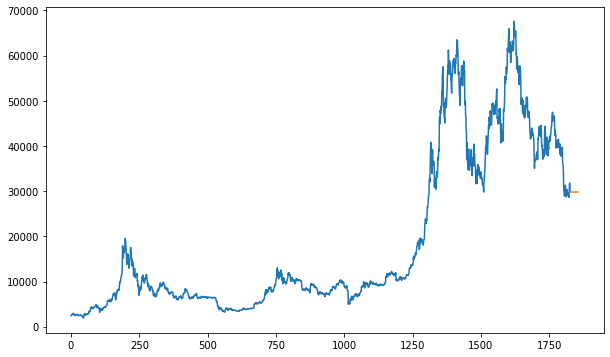

In [ ]:
df['Adj Close'].plot(figsize = (10,6))
predictions_es.plot()